### Calculating P-value

In [1]:
#Import libraries, set the seed, and read in the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

df = pd.read_csv('coffee_dataset.csv')

In [3]:
#create a sample from our data
sample_df = df.sample(150)
sample_df.head()

,user_id,age,drinks_coffee,height
469,6051,>=21,True,68.717822
2635,3405,>=21,True,69.015309
1898,7983,<21,False,66.418863
2795,6606,>=21,True,69.914371
167,4610,>=21,True,66.670203


First scenario:

New scenario

$H_0: \mu \leq 70$

$H_1: \mu > 70$

In [12]:
#create our bootstrap sample
bootsample = sample_df.sample(150, replace=True)

In [13]:
#Bootstrap from the sample
means = []
for _ in range(10000):
    bootsample = sample_df.sample(150,replace=True)
    means.append(bootsample.height.mean())

In [14]:
#Get the standard deviation
np.std(means)

0.2589352938158525

In [15]:
#create a random sample for the null values
null_vals = np.random.normal(70, np.std(means),10000)

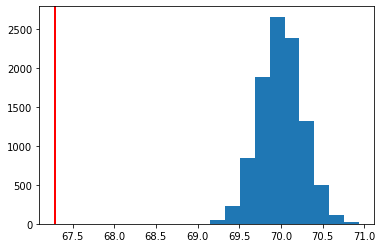

In [16]:
#Plot the null values
plt.hist(null_vals);
plt.axvline(sample_df.height.mean(),color='r', linewidth=2)

In [17]:
#Find the sample mean
sample_mean = sample_df.height.mean()
sample_mean

67.28599874474966

In [18]:
#Calculate the P-value
(null_vals > sample_mean).mean()

1.0

New scenario

$H_0: \mu \geq 70$

$H_1: \mu < 70$

In [19]:
(null_vals < sample_mean).mean()

0.0

New scenario

$H_0: \mu = 70$

$H_1: \mu \neq 70$

In [20]:
null_mean = 70
(null_vals < sample_mean).mean() + (null_vals > null_mean +(null_mean - sample_mean)).mean()

0.0

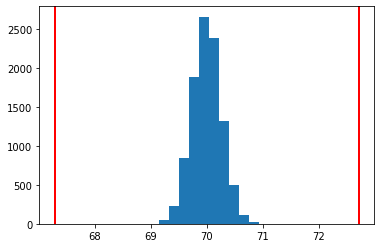

In [21]:
low = sample_mean
high = null_mean + (null_mean - sample_mean)

plt.hist(null_vals);
plt.axvline(low,color='r', linewidth=2)
plt.axvline(high,color='r', linewidth=2)